In [95]:
# needed to load data
import pandas as pd

# needed for scatter_matrix()
from pandas.plotting import scatter_matrix

# needed to tidy up graphs 
import matplotlib.pyplot as plt

# needed for arrays
import numpy as np

# needed to build the model
from sklearn.model_selection import train_test_split

# needed for decision tree
from sklearn.tree import DecisionTreeClassifier

# needed for confusion matrix
from sklearn.metrics import confusion_matrix

# needed for linear regresssion
from sklearn.linear_model import LinearRegression

# needed to plot the decisin tree graph
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO

# needed for accuracy
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

In [6]:
df=pd.read_csv('data/iris.csv')

In [9]:
print("df.head()")
df.head()

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
print("df.shape")
df.shape

df.shape


(150, 5)

In [12]:
print("df.species.value_counts()")
df.species.value_counts()

df.species.valkue_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [13]:
print("df.describe()")
df.describe()

df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


scatter_matrix(<data_frame>)


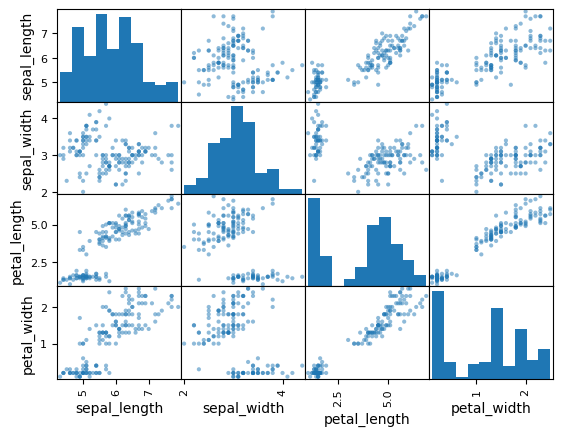

In [28]:
print("scatter_matrix(<data_frame>)")
scatter_matrix(df)
# plt.show() needs to be included to tidy up the graph that is generated 
# otherwise we will see a lot of array output that it not needed and messy
plt.show()

Looks easy to separate out one of the species. For example using petal_length or petal_width. Maybe harder to separate the other two classes which are species

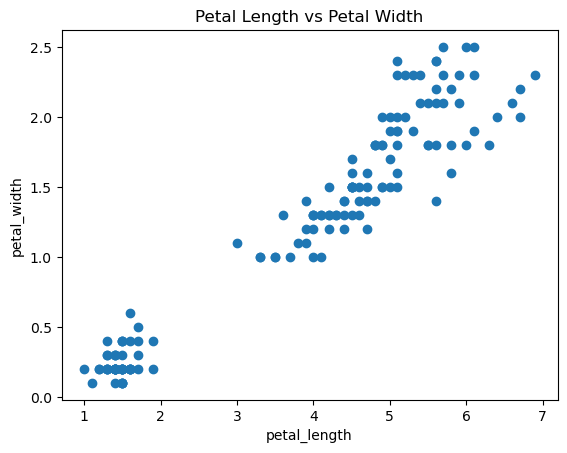

In [34]:
plt.scatter(df.petal_length, df.petal_width)
plt.title("Petal Length vs Petal Width")
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

Looks as if there are an easy separation between one of the classes and the other two, based on petal_length and petal_width

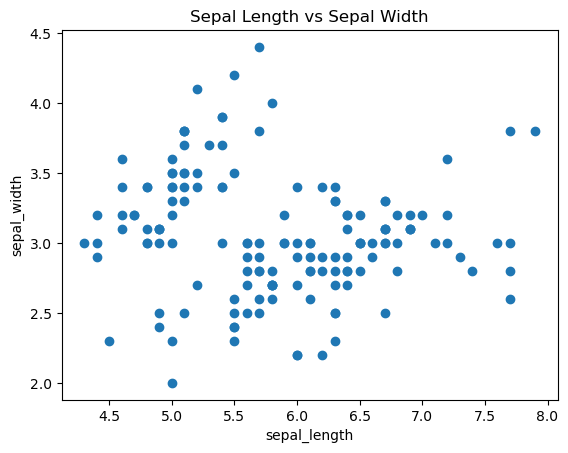

In [35]:
plt.scatter(df.sepal_length, df.sepal_width)
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

# Find sepal_length values for Setosa

In [41]:
print("df.head()")
df.head()

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
d = df.to_numpy()
print("d:", d)

d: [[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.4 3.9 1.3 0.4 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [5.4 3.4 1.7 0.2 'setosa']
 [5.1 3.7 1.5 0.4 'setosa']
 [4.6 3.6 1.0 0.2 'setosa']
 [5.1 3.3 1.7 0.5 'setosa']
 [4.8 3.4 1.9 0.2 'setosa']
 [5.0 3.0 1.6 0.2 'setosa']
 [5.0 3.4 1.6 0.4 'setosa']
 [5.2 3.5 1.5 0.2 'setosa']
 [5.2 3.4 1.4 0.2 'setosa']
 [4.7 3.2 1.6 0.2 'setosa']
 [4.8 3.1 1.6 0.2 'setosa']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.2 4.1 1.5 0.1 'setosa']
 [5.5 4.2 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.0 3.2 1.2 0.2

In [47]:
# : - take all the columns but put condition on row \/
# 4 = setosa is a row condition to pick all rows where the species value (index 4) is setosa
print("Find all setosas (d[:, 4]):\n", d[d[:, 4] == "setosa", 0])

Find all setosas (d[:, 4]):
 [5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0]


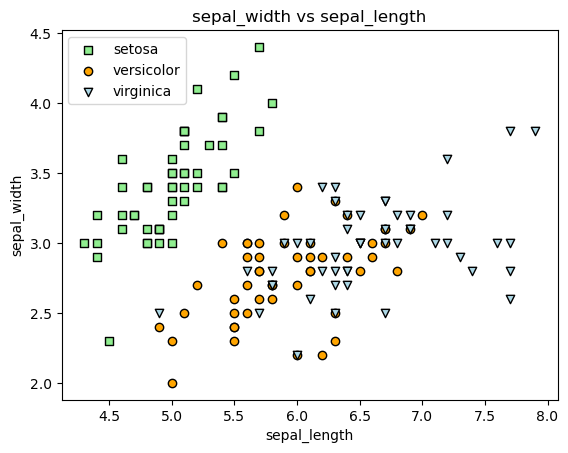

In [55]:
# scatter plot for sepal_length and sepal_width for each species
d = np.array(df)
# 4 is a column eg taken from df.head() which is SPECIES
# d[d[:,4] == "setosa", 0] - get first column, and find all setosas
# d[d[:,4] == "setosa", 1] - get second column, and find all setosas

plt.title("sepal_width vs sepal_length")

# scaterring them in as 3 different entries allows us to plot 1 graph with many balues 
# marker is the shape of the points in the graph
# 's' = sqare, 'o' = round, 'v' = v shape
plt.scatter(d[d[:,4] == "setosa", 0], d[d[:,4] == "setosa", 1], c='lightgreen', marker='s', edgecolor='black', label='setosa')
plt.scatter(d[d[:,4] == "versicolor", 0], d[d[:,4] == "versicolor", 1], c='orange', marker='o', edgecolor='black', label='versicolor')
plt.scatter(d[d[:,4] == "virginica", 0], d[d[:,4] == "virginica", 1], c='lightblue', marker='v', edgecolor='black', label='virginica')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc="upper left")

# putting plt.show() at the end allows us to have many entries in 1 graph
plt.show()

sepal_length and sepal_width seems to separate the setosa, but not really because we cant draw diagonal lines with a decision tree

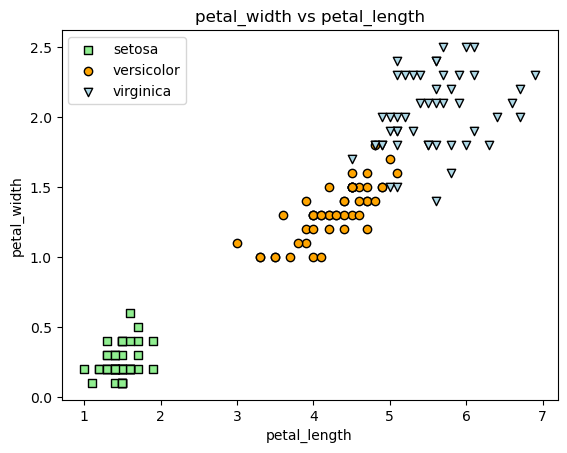

In [52]:
# scatter plot for petal_length and petal_width for each species
d = np.array(df)
# d[d[:,4] == "setosa", 0] - get first column 
# d[d[:,4] == "setosa", 1] - get second column
# d[d[:,4] == "setosa", 2] - get third column 
# d[d[:,4] == "setosa", 3] - get forth column

plt.title("petal_width vs petal_length")

# 's' = sqare, 'o' = round, 'v' = v shape
plt.scatter(d[d[:,4] == "setosa", 2], d[d[:,4] == "setosa", 3], c='lightgreen', marker='s', edgecolor='black', label='setosa')
plt.scatter(d[d[:,4] == "versicolor", 2], d[d[:,4] == "versicolor", 3], c='orange', marker='o', edgecolor='black', label='versicolor')
plt.scatter(d[d[:,4] == "virginica", 2], d[d[:,4] == "virginica", 3], c='lightblue', marker='v', edgecolor='black', label='virginica')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(loc="upper left")

plt.show()

petal_length and petal_width are the most important features that will be used in decision tree as we can clearly separate setosas that way

# Build The Model

In [61]:
X = df.drop(columns='species')
y = df.species
print("X:", X.shape)
print("\ny:", y.shape)

X: (150, 4)

y: (150,)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=1, stratify=y)
print("X_train:", X_train.shape) # 125 instances in train data
print("X_test:",X_test.shape) # 25 instances in test data
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (125, 4)
X_test: (25, 4)
y_train: (125,)
y_test: (25,)


# Create Decision Tree

In [71]:
# we can set the limit of the max_depth 
#model = DecisionTreeClassifier(max_depth=10)
model = DecisionTreeClassifier()
# model must be always fitted from TRAIN data
model.fit(X_train, y_train)
model.get_depth()

6

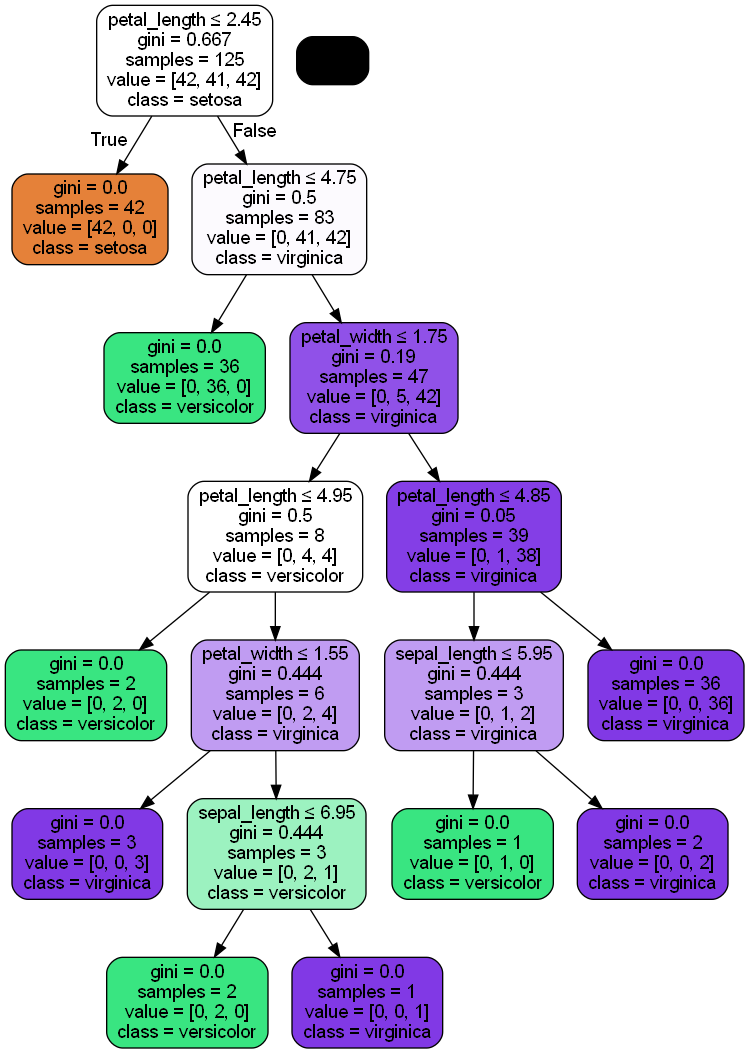

In [97]:
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/iris.png')
Image(graph.create_png())

# Evaluate The Model

In [86]:
print("Training Accuracy:", model.score(X_train, y_train))

Training Accuracy: 1.0


In [84]:
print("Test Accuracy:", model.score(X_test, y_test))

Test Accuracy: 0.96


In [100]:
# Get Prediction
y_hat=model.predict(X_test)
# print("Test Accuracy:", accuracy_score(y_test, y_hat))

In [82]:
cm = confusion_matrix(y_test, y_hat)
cm = confusion_matrix(y_test, y_hat, labels=["setosa", "versicolor", "virginica"])
print("cm:", cm)

cm: [[8 0 0]
 [0 9 0]
 [0 1 7]]
